### Quantum Representations of Audio

In [1]:
import quantumaudio
from tools import plot, audio, interactive
#from quantumaudio import utils

### Contents

- Example with 3 Basic Schemes
- Example with 2 Multi-channel Schemes
- Audio Example

In [2]:
import numpy as np
signal = np.random.rand(1,8)
two_d_signal = np.random.rand(2,8)

In [3]:
#plot.plot(signal)
#plot.plot(two_d_signal)

#### Part A) Example with 3 Basic Schemes

#### Scheme 1 - Quantum Probability Amplitude Modulation (QPAM)

In [4]:
qpam = quantumaudio.load_scheme('qpam')

Number of qubits required: 3

3 for time
0 for amplitude




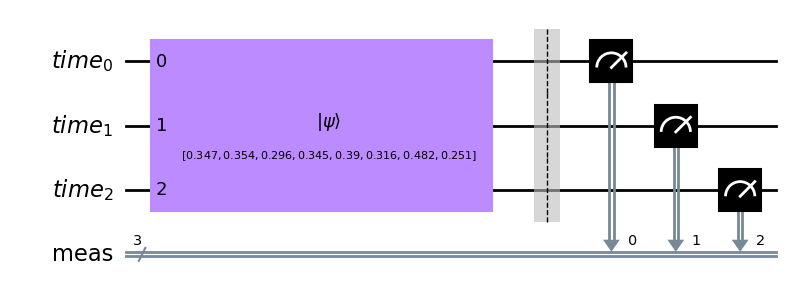

In [5]:
circuit_1 = qpam.encode(signal,verbose=2)

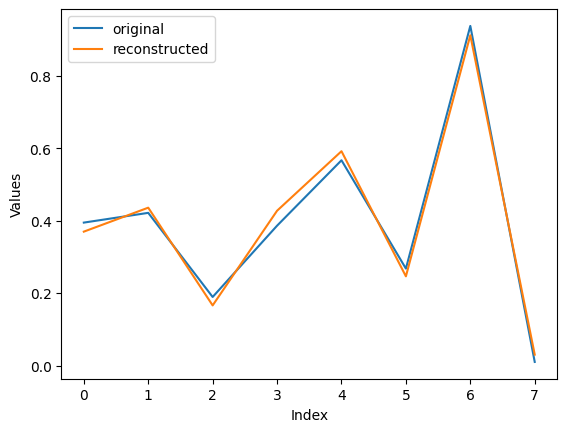

In [6]:
plot([signal,qpam.decode(circuit_1)])

In [8]:
interactive.tune(circuit_1,function=qpam.decode,step=2,max_value=4000,ref=signal)

interactive(children=(IntSlider(value=1, description='Shots', max=4000, min=1, step=2), Output()), _dom_classe…

<function tools.interactive.tune.<locals>.plot_function(shots)>

#### Scheme 2 - Single-Qubit Probability Amplitude Modulation (SQPAM)

In [9]:
sqpam = quantumaudio.load_scheme('sqpam')

Number of qubits required: 4

3 for time
1 for amplitude




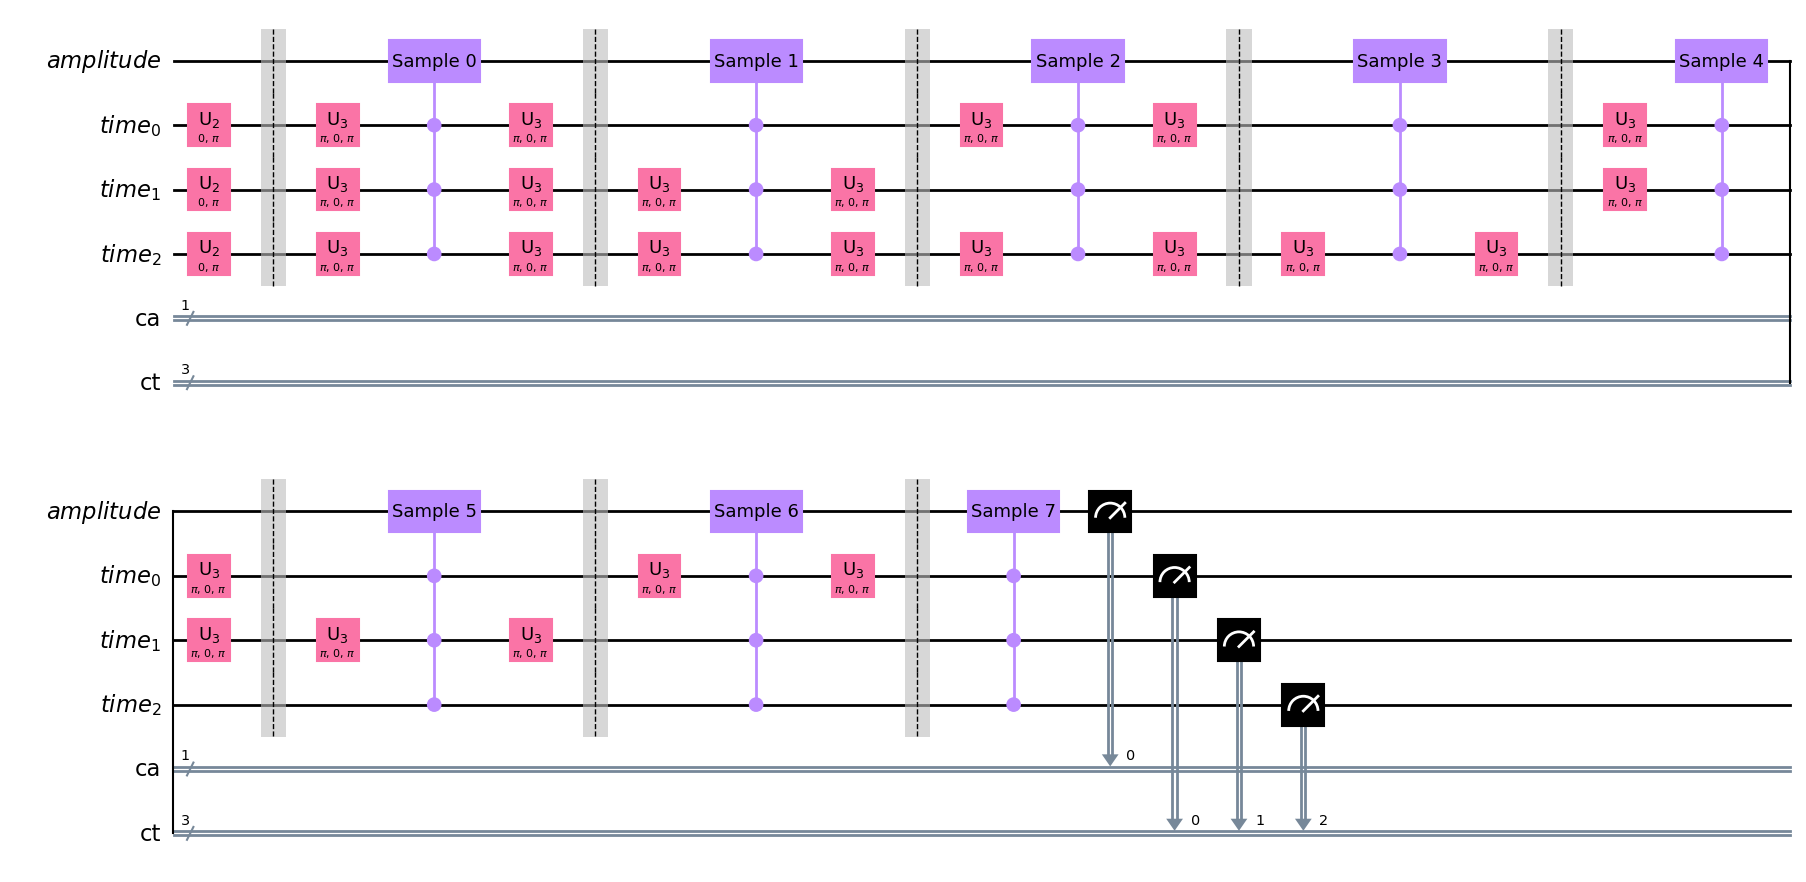

In [10]:
circuit_2 = sqpam.encode(signal)

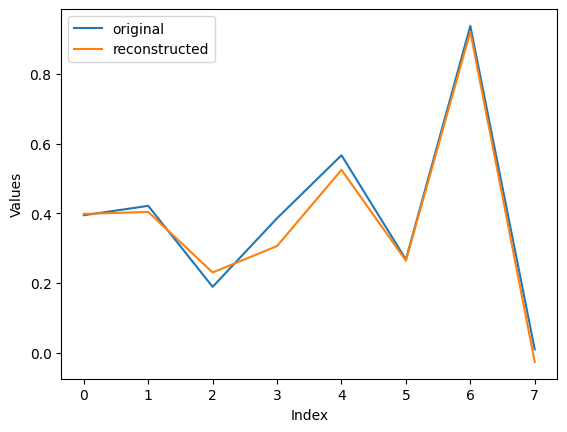

In [11]:
plot([signal,sqpam.decode(circuit_2)])

In [12]:
interactive.tune(circuit_2,function=sqpam.decode,step=2,max_value=4000,ref=signal)

interactive(children=(IntSlider(value=1, description='Shots', max=4000, min=1, step=2), Output()), _dom_classe…

<function tools.interactive.tune.<locals>.plot_function(shots)>

#### Scheme 3 - Quantum State Modulation (QSM) Scheme

In [13]:
qsm = quantumaudio.load_scheme('qsm')

Number of qubits required: 6

3 for time
3 for amplitude




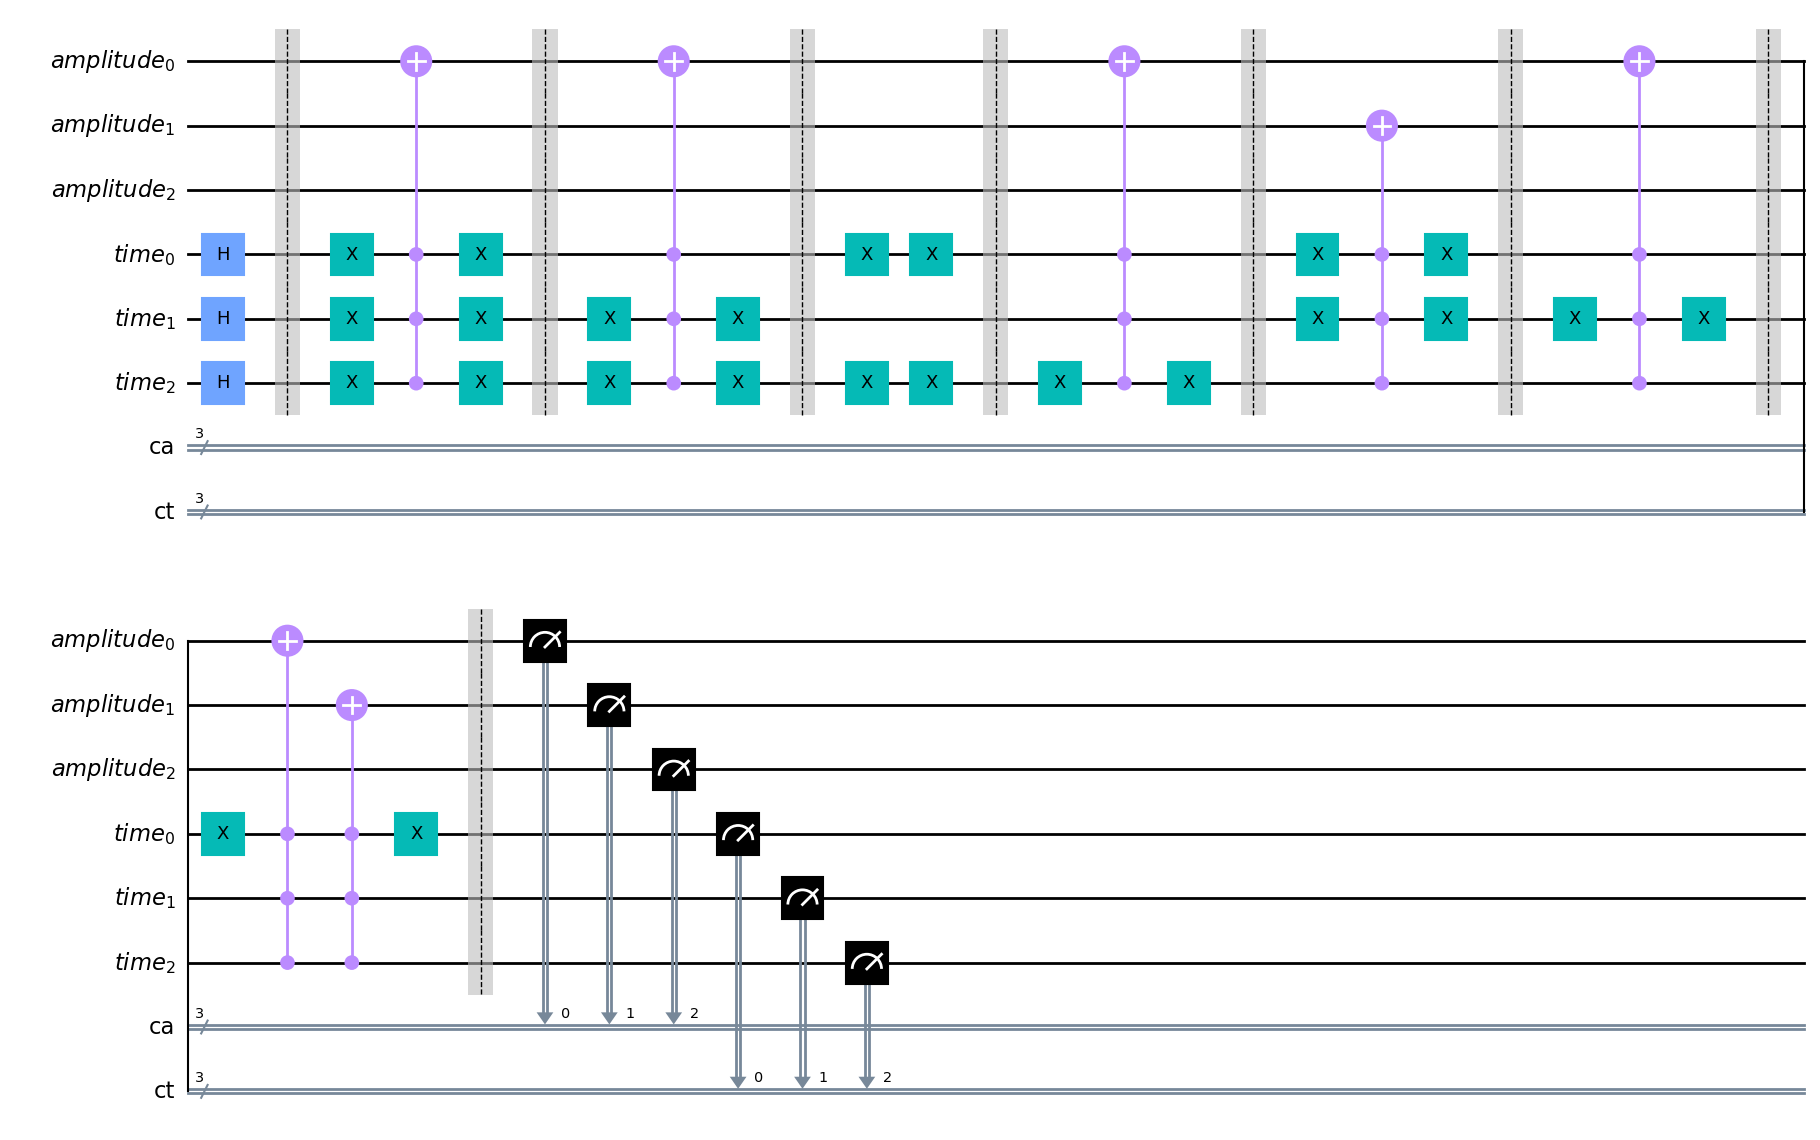

In [14]:
circuit_3 = qsm.encode(signal)

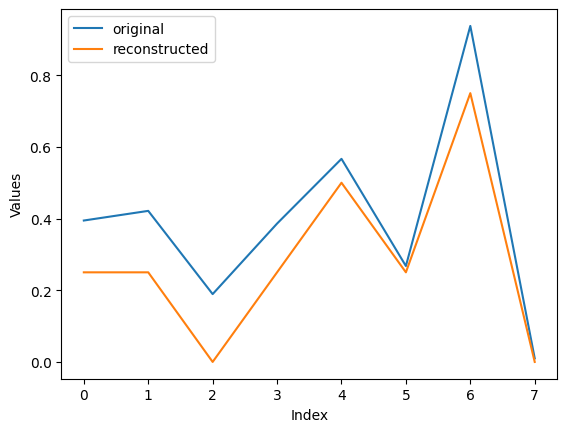

In [15]:
plot([signal,qsm.decode(circuit_3)])

In [16]:
interactive.tune(circuit_3,function=qsm.decode,step=2,max_value=4000,ref=signal)

interactive(children=(IntSlider(value=1, description='Shots', max=4000, min=1, step=2), Output()), _dom_classe…

<function tools.interactive.tune.<locals>.plot_function(shots)>

#### Part B) Multi-channel Signal Example with 2 Schemes

#### Scheme 1 - Multi-Channel SQPAM

In [17]:
msqpam = quantumaudio.load_scheme('msqpam')

Number of qubits required: 5

3 for time
1 for channel
1 for amplitude




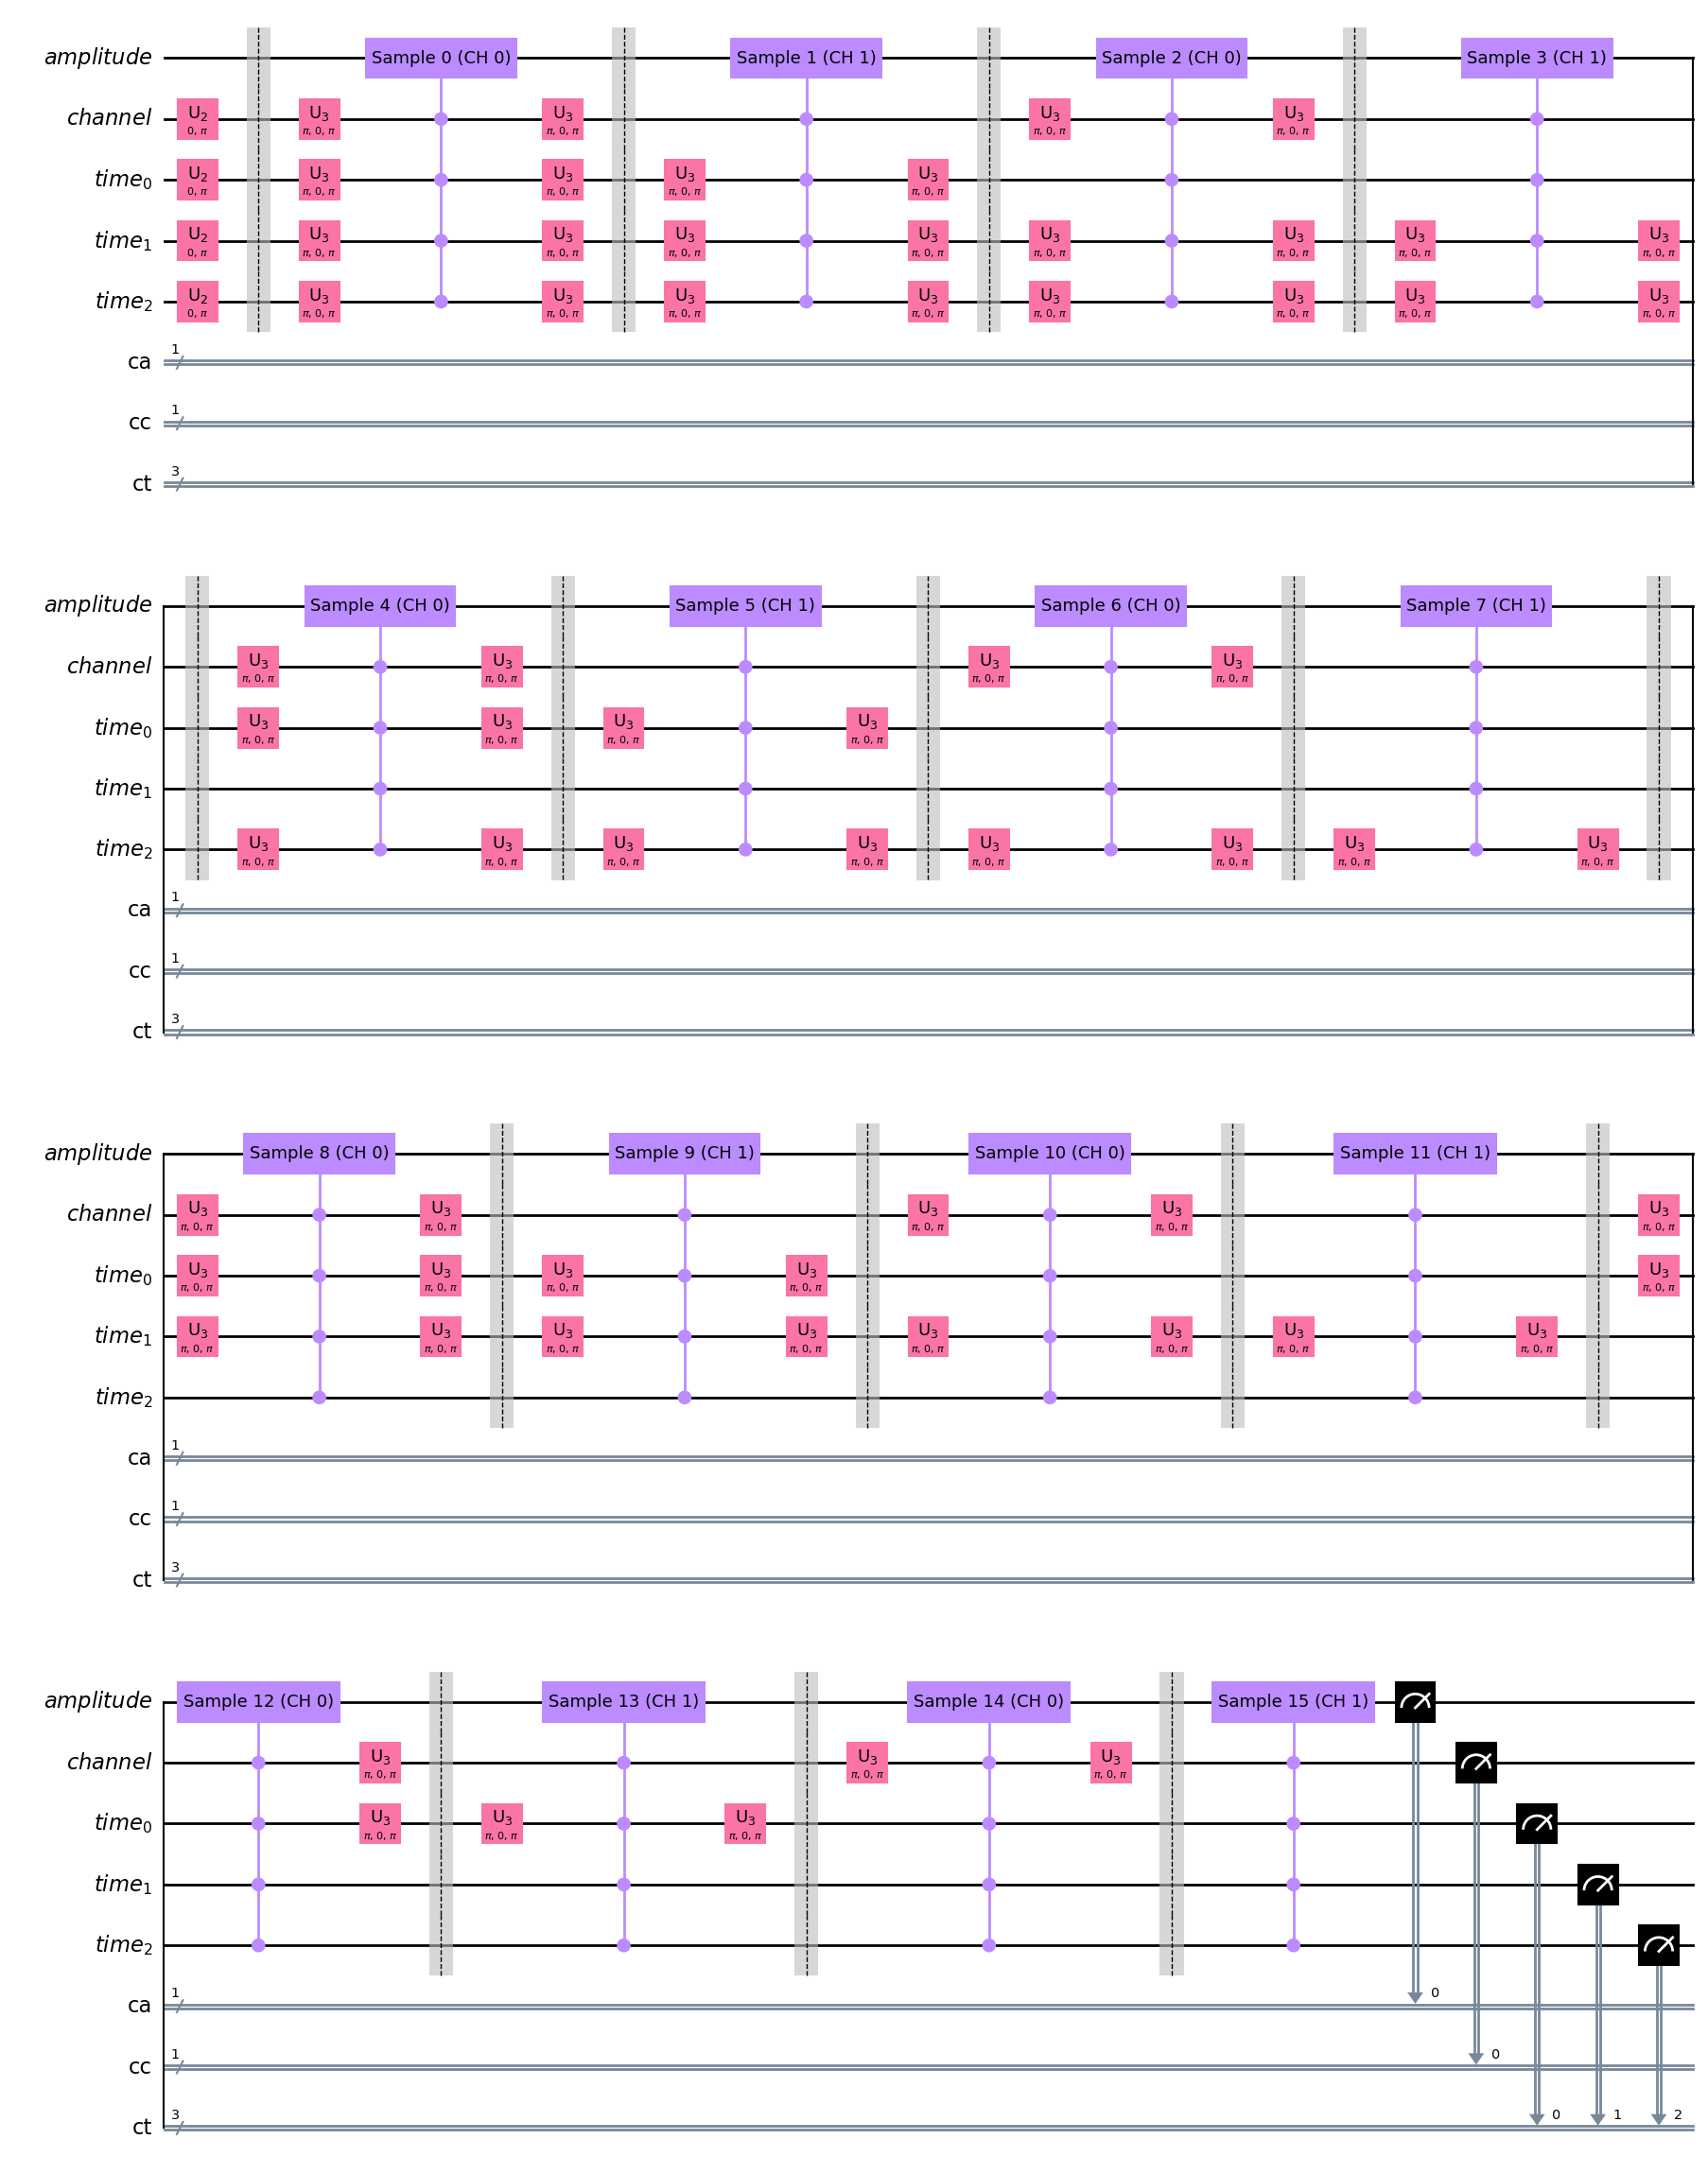

In [18]:
circuit_4 = msqpam.encode(two_d_signal)

In [19]:
reconstructed_signal = msqpam.decode(circuit_4)

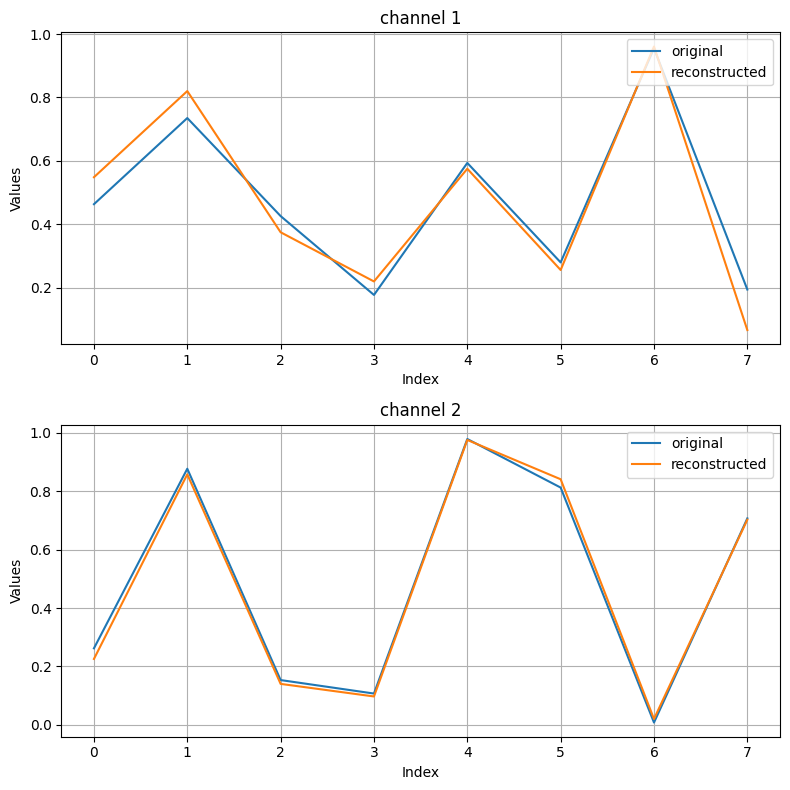

In [20]:
plot([two_d_signal,reconstructed_signal])

#### Scheme 2 - Multi-channel QSM

In [21]:
mqsm = quantumaudio.load_scheme('mqsm')

Number of qubits required: 8

3 for time
1 for channel
4 for amplitude




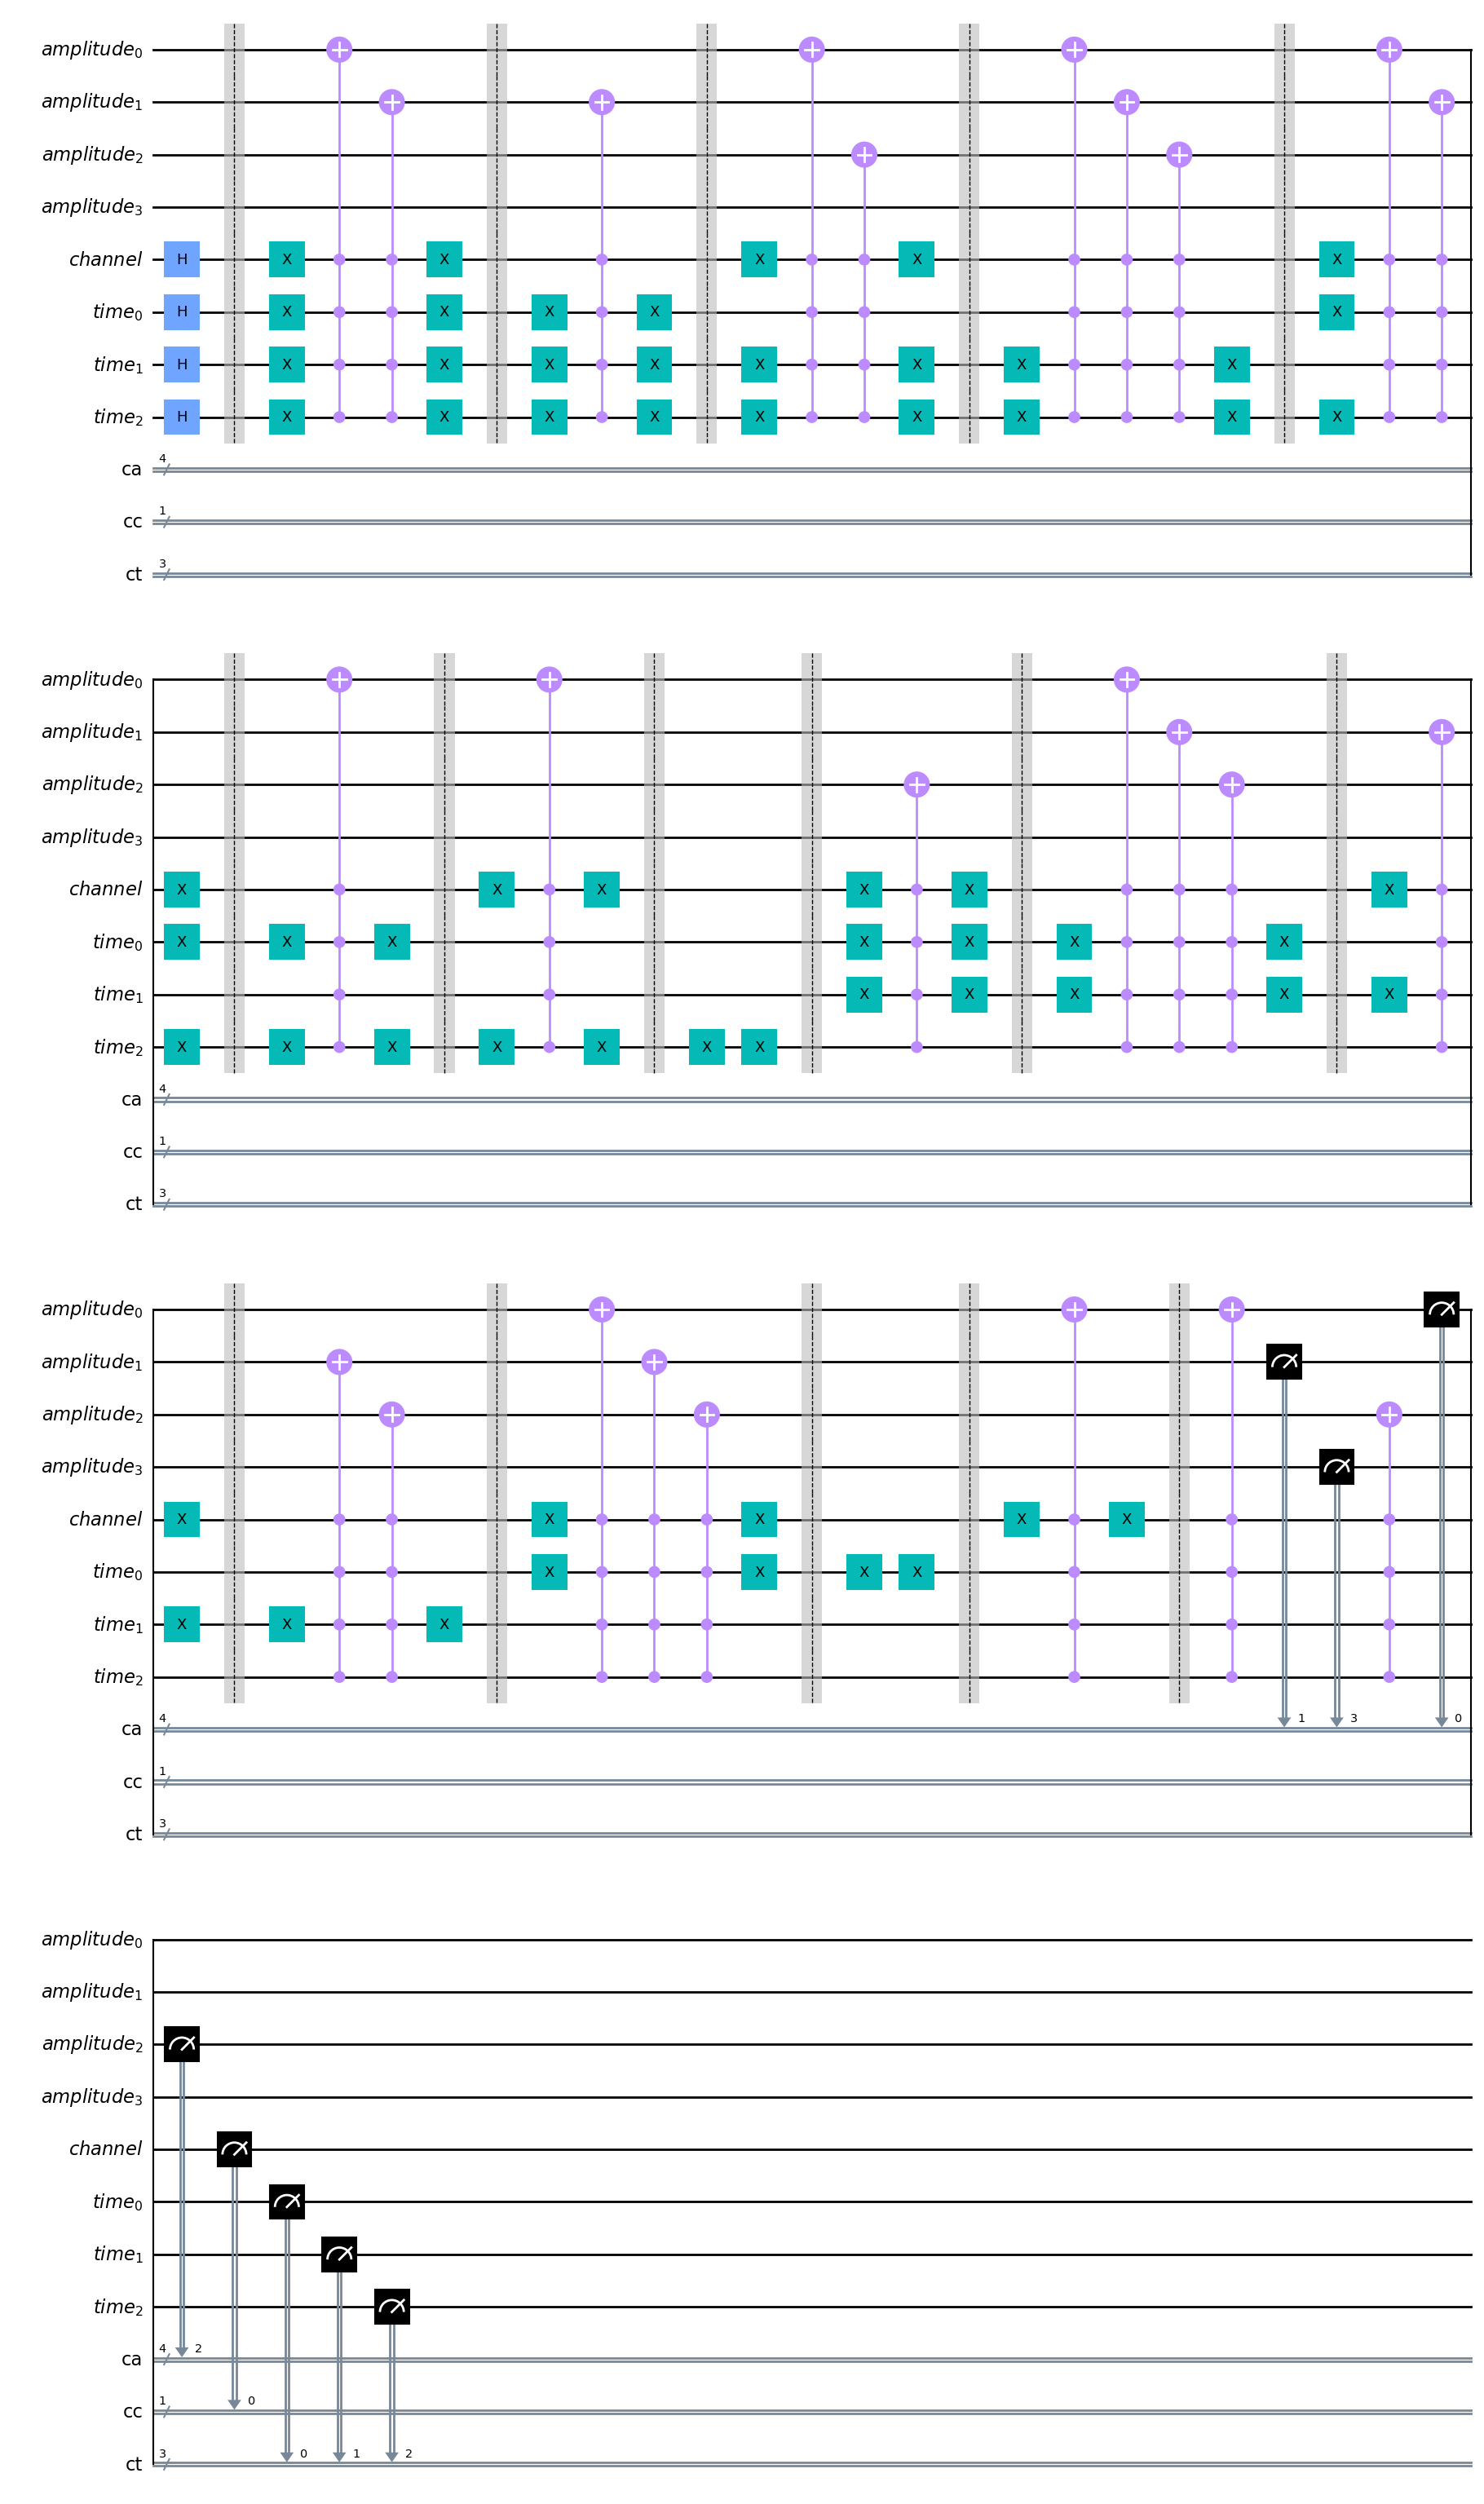

In [22]:
circuit_5 = mqsm.encode(two_d_signal)

In [23]:
reconstructed_signal = mqsm.decode(circuit_5)

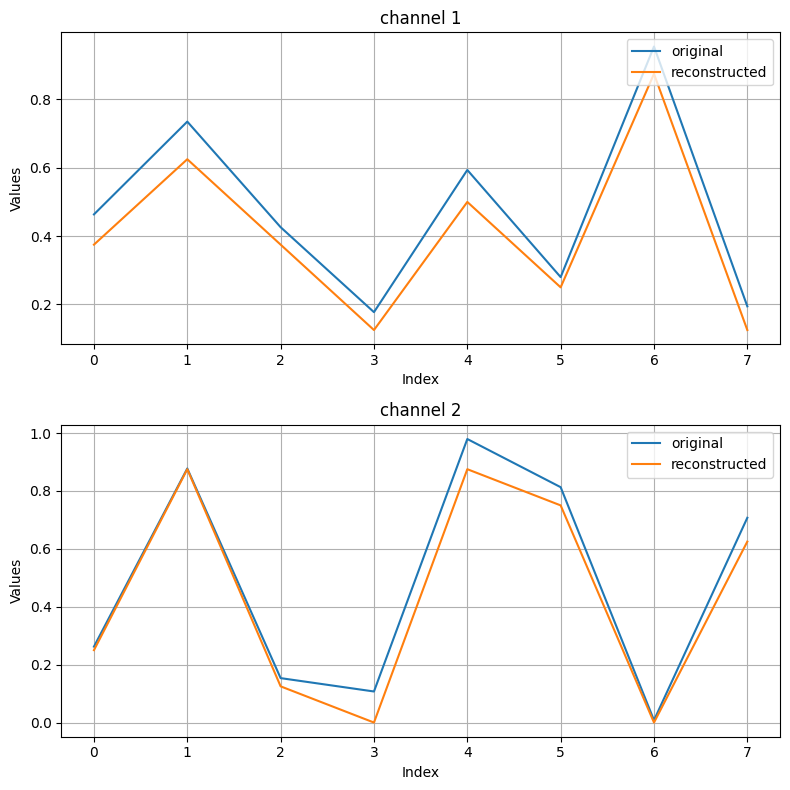

In [24]:
plot([two_d_signal,reconstructed_signal])

#### More Channel

In [25]:
four_d_signal = np.random.rand(4,4)

Number of qubits required: 8

2 for time
2 for channel
4 for amplitude




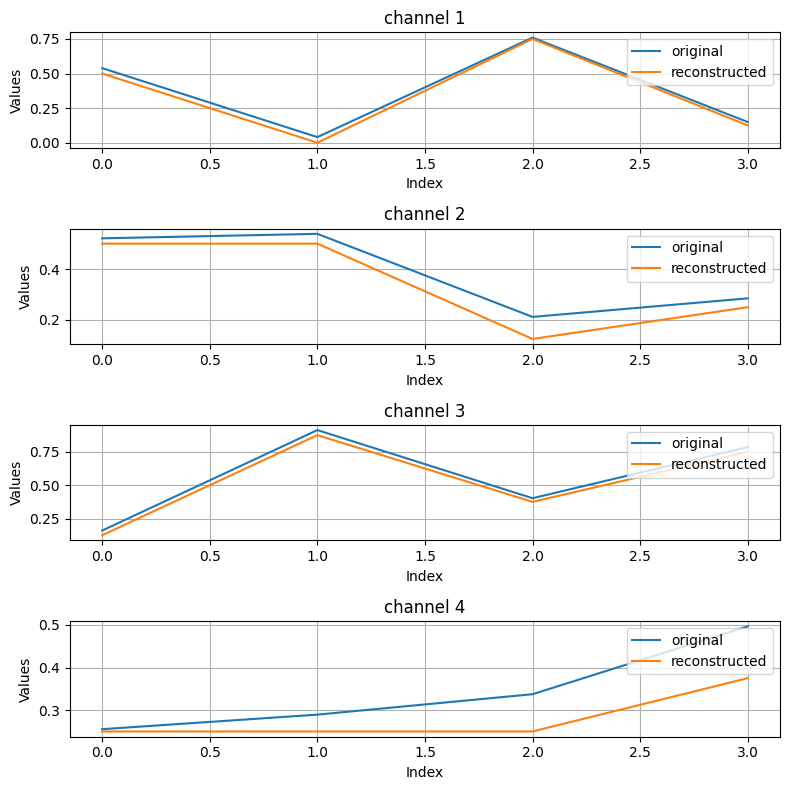

In [28]:
plot([four_d_signal,mqsm.decode(mqsm.encode(four_d_signal,verbose=1))])

#### Part C) Audio Example

In [29]:
path = 'samples/lead_guitar.mp3'

In [30]:
y,sr = audio.get_quantumaudio(path,scheme=qpam)

Shape: (99648,)
Num samples: 99648, Num channels: 1, Buffer size: 256
Number of chunks: 390
Shape per buffer: (1, 256)


100%|█████████████████████████████████████████| 390/390 [00:04<00:00, 89.14it/s]


In [31]:
import tools

In [32]:
audio_chunks = tools.stream.get_chunks(audio.read(path)[0])

Shape: (99648,)
Num samples: 99648, Num channels: 1, Buffer size: 256
Number of chunks: 390
Shape per buffer: (1, 256)


In [33]:
interactive.tune_audio(audio_chunks,scheme=qpam,function=tools.stream.process_chunks)

interactive(children=(IntSlider(value=1, continuous_update=False, description='Shots', max=8000, min=1, step=1…

<function tools.interactive.tune_audio.<locals>.plot_function(shots)>